In [1]:
import time
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import math
import sys
import os
from Manifold_Analysis import Manifold_analysis
sys.path.append('../../../')
from algos.agents import A2CAgent
from algos.models import ActorCnn, CriticCnn
from algos.preprocessing.stack_frame import preprocess_frame, stack_frame

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances

from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from functools import partial
from sklearn import manifold, datasets

import cv2

/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [2]:
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

## Init GPU or CPU

In [3]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cpu


## Create Environment

In [4]:
#env = gym.make('SpaceInvaders-v0',render_mode='human')
env = gym.make('SpaceInvaders-v0')


env.seed(0)

def stack_frames(frames, state, is_new=False):
    frame = preprocess_frame(state, (8, -12, -12, 4), 84)
    frames = stack_frame(frames, frame, is_new)

    return frames
    

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


## Create Agent

In [5]:
INPUT_SHAPE = (4, 84, 84)
ACTION_SIZE = env.action_space.n
SEED = 0
GAMMA = 0.99           # discount factor
ALPHA= 0.0001          # Actor learning rate
BETA = 0.0005          # Critic learning rate
UPDATE_EVERY = 100     # how often to update the network 


epsilon_by_epsiode = lambda frame_idx: EPS_END + (EPS_START - EPS_END) * math.exp(-1. * frame_idx /EPS_DECAY)

start_epoch = 0
scores = []
scores_window = deque(maxlen=20)
length_trial = 500

In [6]:


agent_init = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)
agent_1000 = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)
agent_2000 = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)
agent_3000 = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)
agent_4000 = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)
agent_5000 = A2CAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, GAMMA, ALPHA, BETA, UPDATE_EVERY, ActorCnn, CriticCnn)





Liste_agents = {
    "agent_a2c_init" : agent_init,
    "agent_a2c_1000" : agent_1000,
    "agent_a2c_2000" : agent_2000,
    "agent_a2c_3000" : agent_3000,
    "agent_a2c_4000" : agent_4000,
    "agent_a2c_5000" : agent_5000,
}

Liste_agents = {

    "agent_a2c_2000" : agent_2000,

}



## Load Agents corresponding to different part of the training

In [7]:
for a in Liste_agents.keys():
    if a != "agent_a2c_init":
        
        PATH = os.path.join(os.getcwd(),"Models_training_a2c_space_invader",a+ ".pt")
        print(PATH)
        checkpoint = torch.load(PATH , map_location=torch.device('cpu'))
        Liste_agents[a].actor_net.load_state_dict(checkpoint['modelA_state_dict'])
        Liste_agents[a].critic_net.load_state_dict(checkpoint['modelB_state_dict'])
        Liste_agents[a].actor_optimizer.load_state_dict(checkpoint['optimizerA_state_dict'])
        Liste_agents[a].critic_optimizer.load_state_dict(checkpoint['optimizerB_state_dict'])


/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Analysis/Models_training_a2c_space_invader/agent_a2c_2000.pt


In [13]:
Names_hook = ["Conv_1","Conv_2","Conv_3","fc1"]
EPISODES = 10

Liste_activation = [[[[]for i in range(len(Names_hook)) ] for episode in range(EPISODES) ] for j in range(len( Liste_agents))]

print(Liste_activation[0][:][4])
#Liste_activation = [[[[] for i in range(len(Names_hook))] for j in range(len( Liste_agents))] for episode in range(EPISODES)]
i = 0
Final_score = [[[]for episode in range(EPISODES)]for j in range(len( Liste_agents))]
agent_number = 0
for agent in Liste_agents.values() :
    
    agent.registration()

    for episode in range(EPISODES):
        while i < length_trial:
            score = 0
            Liste_activation[agent_number][episode]= [[] for i in range(len(Names_hook))]
            state = stack_frames(None, env.reset(), True)
            i = 0
            while True:
                
                action, _, _ = agent.act(state)
                for h in range(len(Names_hook)):
                    #Liste_activation[episode][agent_number][h].append(torch.flatten(agent.activation[Names_hook[h]]))  # If concatenate list directly with Liste_activation[agent_number][h] += torch.flatten(agent.activation[Names_hook[h]]) takes much more time
            
       
                    Liste_activation[agent_number][episode][h].append(torch.flatten(agent.activation[Names_hook[h]]))  # If concatenate list directly with Liste_activation[agent_number][h] += torch.flatten(agent.activation[Names_hook[h]]) takes much more time


                next_state, reward, done, _ = env.step(action)
                score += reward
                state = stack_frames(state, next_state, False)
                i+=1
                if done:
                    print('\nEpisode :{} \tAgent number :{} \tFinal score: {:.2f} \tNumber of steps: {}'.format(episode,agent_number, score,i), end="")
                    
                    break 
            env.close()

        i = 0  
        Final_score[agent_number][episode].append(score)
        
    agent.detach()
    agent_number += 1
#Final_score= (np.array(Final_score))[:,:,0]

        

    

[[], [], [], []]

Episode :0 	Agent number :0 	Final score: 170.00 	Number of steps: 923
Episode :1 	Agent number :0 	Final score: 60.00 	Number of steps: 364
Episode :1 	Agent number :0 	Final score: 150.00 	Number of steps: 899
Episode :2 	Agent number :0 	Final score: 75.00 	Number of steps: 367
Episode :2 	Agent number :0 	Final score: 335.00 	Number of steps: 1250
Episode :3 	Agent number :0 	Final score: 150.00 	Number of steps: 698
Episode :4 	Agent number :0 	Final score: 20.00 	Number of steps: 549
Episode :5 	Agent number :0 	Final score: 145.00 	Number of steps: 836
Episode :6 	Agent number :0 	Final score: 110.00 	Number of steps: 497
Episode :6 	Agent number :0 	Final score: 90.00 	Number of steps: 539
Episode :7 	Agent number :0 	Final score: 230.00 	Number of steps: 997
Episode :8 	Agent number :0 	Final score: 165.00 	Number of steps: 551
Episode :9 	Agent number :0 	Final score: 160.00 	Number of steps: 697

In [14]:
analysis = Manifold_analysis(length_trial)


In [15]:
Final_score= np.array(Final_score)
FINAL_SCORE = np.mean(Final_score,axis =0)

In [25]:
activity_layer = [[[[] for i in range(len(Names_hook))] for episode in range(EPISODES) ] for j in range(len( Liste_agents))]
print(len(Liste_activation[0][0]))
Prepro_length = True

for agent_number in range(len(Liste_agents)):
    print("agent_number",agent_number)
    for layer in range(len(Names_hook)):
        for episode in range(EPISODES):
            print(episode)
            b =  analysis.prepro(Liste_activation[agent_number][episode][layer],Prepro_length)
            activity_layer[agent_number][episode][layer] = analysis.prepro(Liste_activation[agent_number][episode][layer],Prepro_length)
            

4
agent_number 0
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


## Compute the Isomap

agent_number 0
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)
(500, 3)


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(500, 3)
(500, 3)


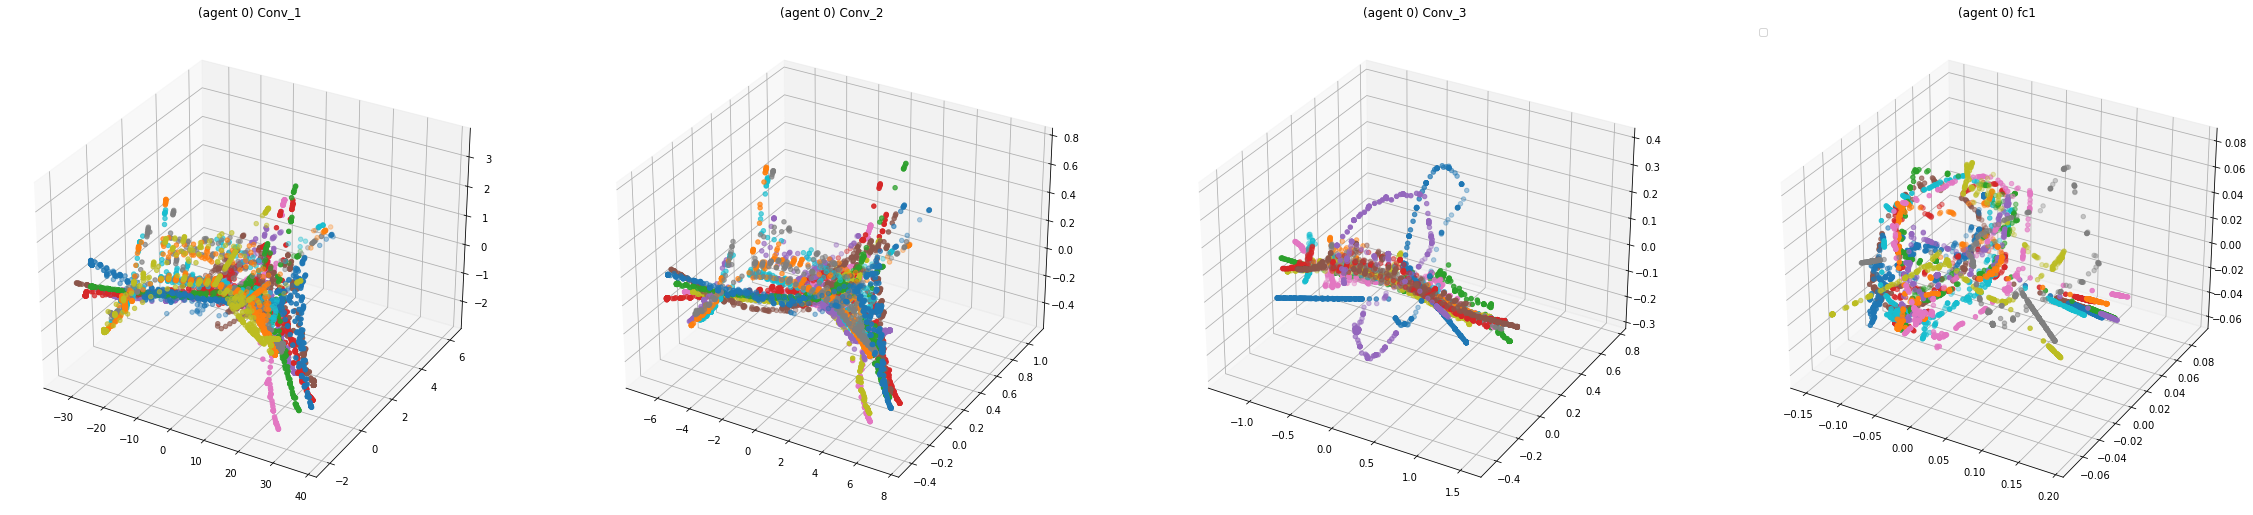

In [28]:
embedding = Isomap(n_neighbors=20,n_components=3)
i = 1
fig = plt.figure(figsize=(40, 30))
for agent_number in range(len(Liste_agents)):
    print("agent_number",agent_number)
    for layer in range(len(Names_hook)):
        ax = fig.add_subplot(len(Liste_agents), len(Names_hook),i,projection='3d')
        #ax.axis("tight")
        ax.set_title("(agent %s) %s" % (agent_number, Names_hook[layer]))
        for episode in range(EPISODES):
            #activity_layer[episode][agent_number][layer] = analysis.prepro(Liste_activation[episode][agent_number][layer])
            X = embedding.fit_transform(activity_layer[agent_number][episode][layer])
            print(X.shape)
            #colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 7))
            ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
        #ax.view_init(azim=80, elev=30)
        
        i+=1




plt.legend(loc='upper left')
plt.show()



## MDS plot

In [15]:
D = pairwise_distances(activity_layer[agent_number][episode][layer])
model = MDS(n_components=dimension, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)

NameError: name 'activation' is not defined

agent_number 0


ValueError: Array must be symmetric

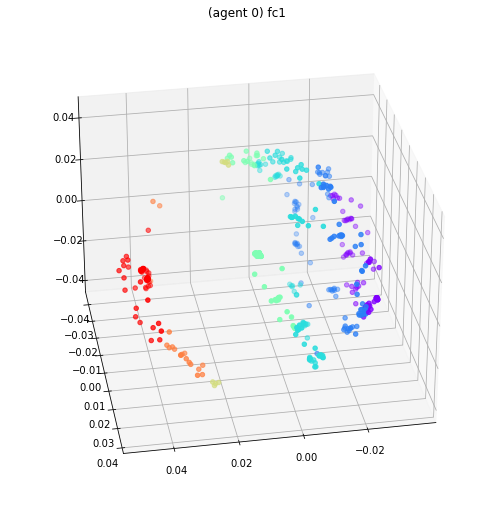

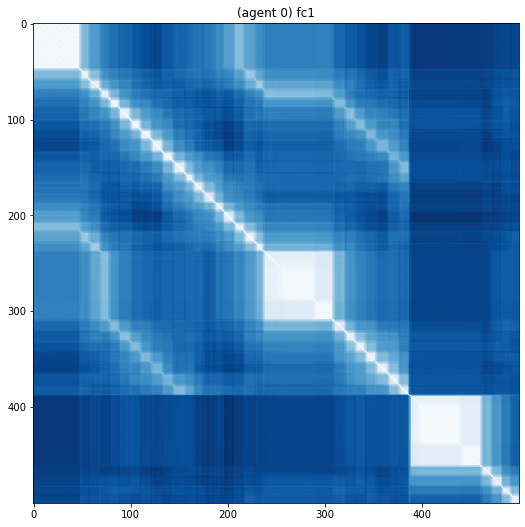

In [20]:

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
i = 1
fig = plt.figure(figsize=(40, 30))

fig2 = plt.figure(figsize=(40, 30))
for agent_number in range(len(Liste_agents)):
    print("agent_number",agent_number)
    for layer in range(len(Names_hook)):
        activity_layer = analysis.prepro(Liste_activation[0][agent_number][layer])

        D = pairwise_distances(activity_layer)
        X  = model.fit_transform(D)
        colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 7))
        ax = fig.add_subplot(len(Liste_agents), len(Names_hook),i,projection='3d')
        sc = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],**colorize)
        ax.view_init(azim=80, elev=30)
        ax.axis("tight")
        ax.set_title("(agent %s) %s" % (agent_number, Names_hook[layer]))

        ax2 = fig2.add_subplot(len(Liste_agents), len(Names_hook),i)
        ax2.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
        ax2.axis("tight")
        ax2.set_title("(agent %s) %s" % (agent_number, Names_hook[layer]))






        i+=1
plt.show()

## t-SNE

agent_number 0


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:79

agent_number 1


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:79

agent_number 2


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:79

agent_number 3


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:79

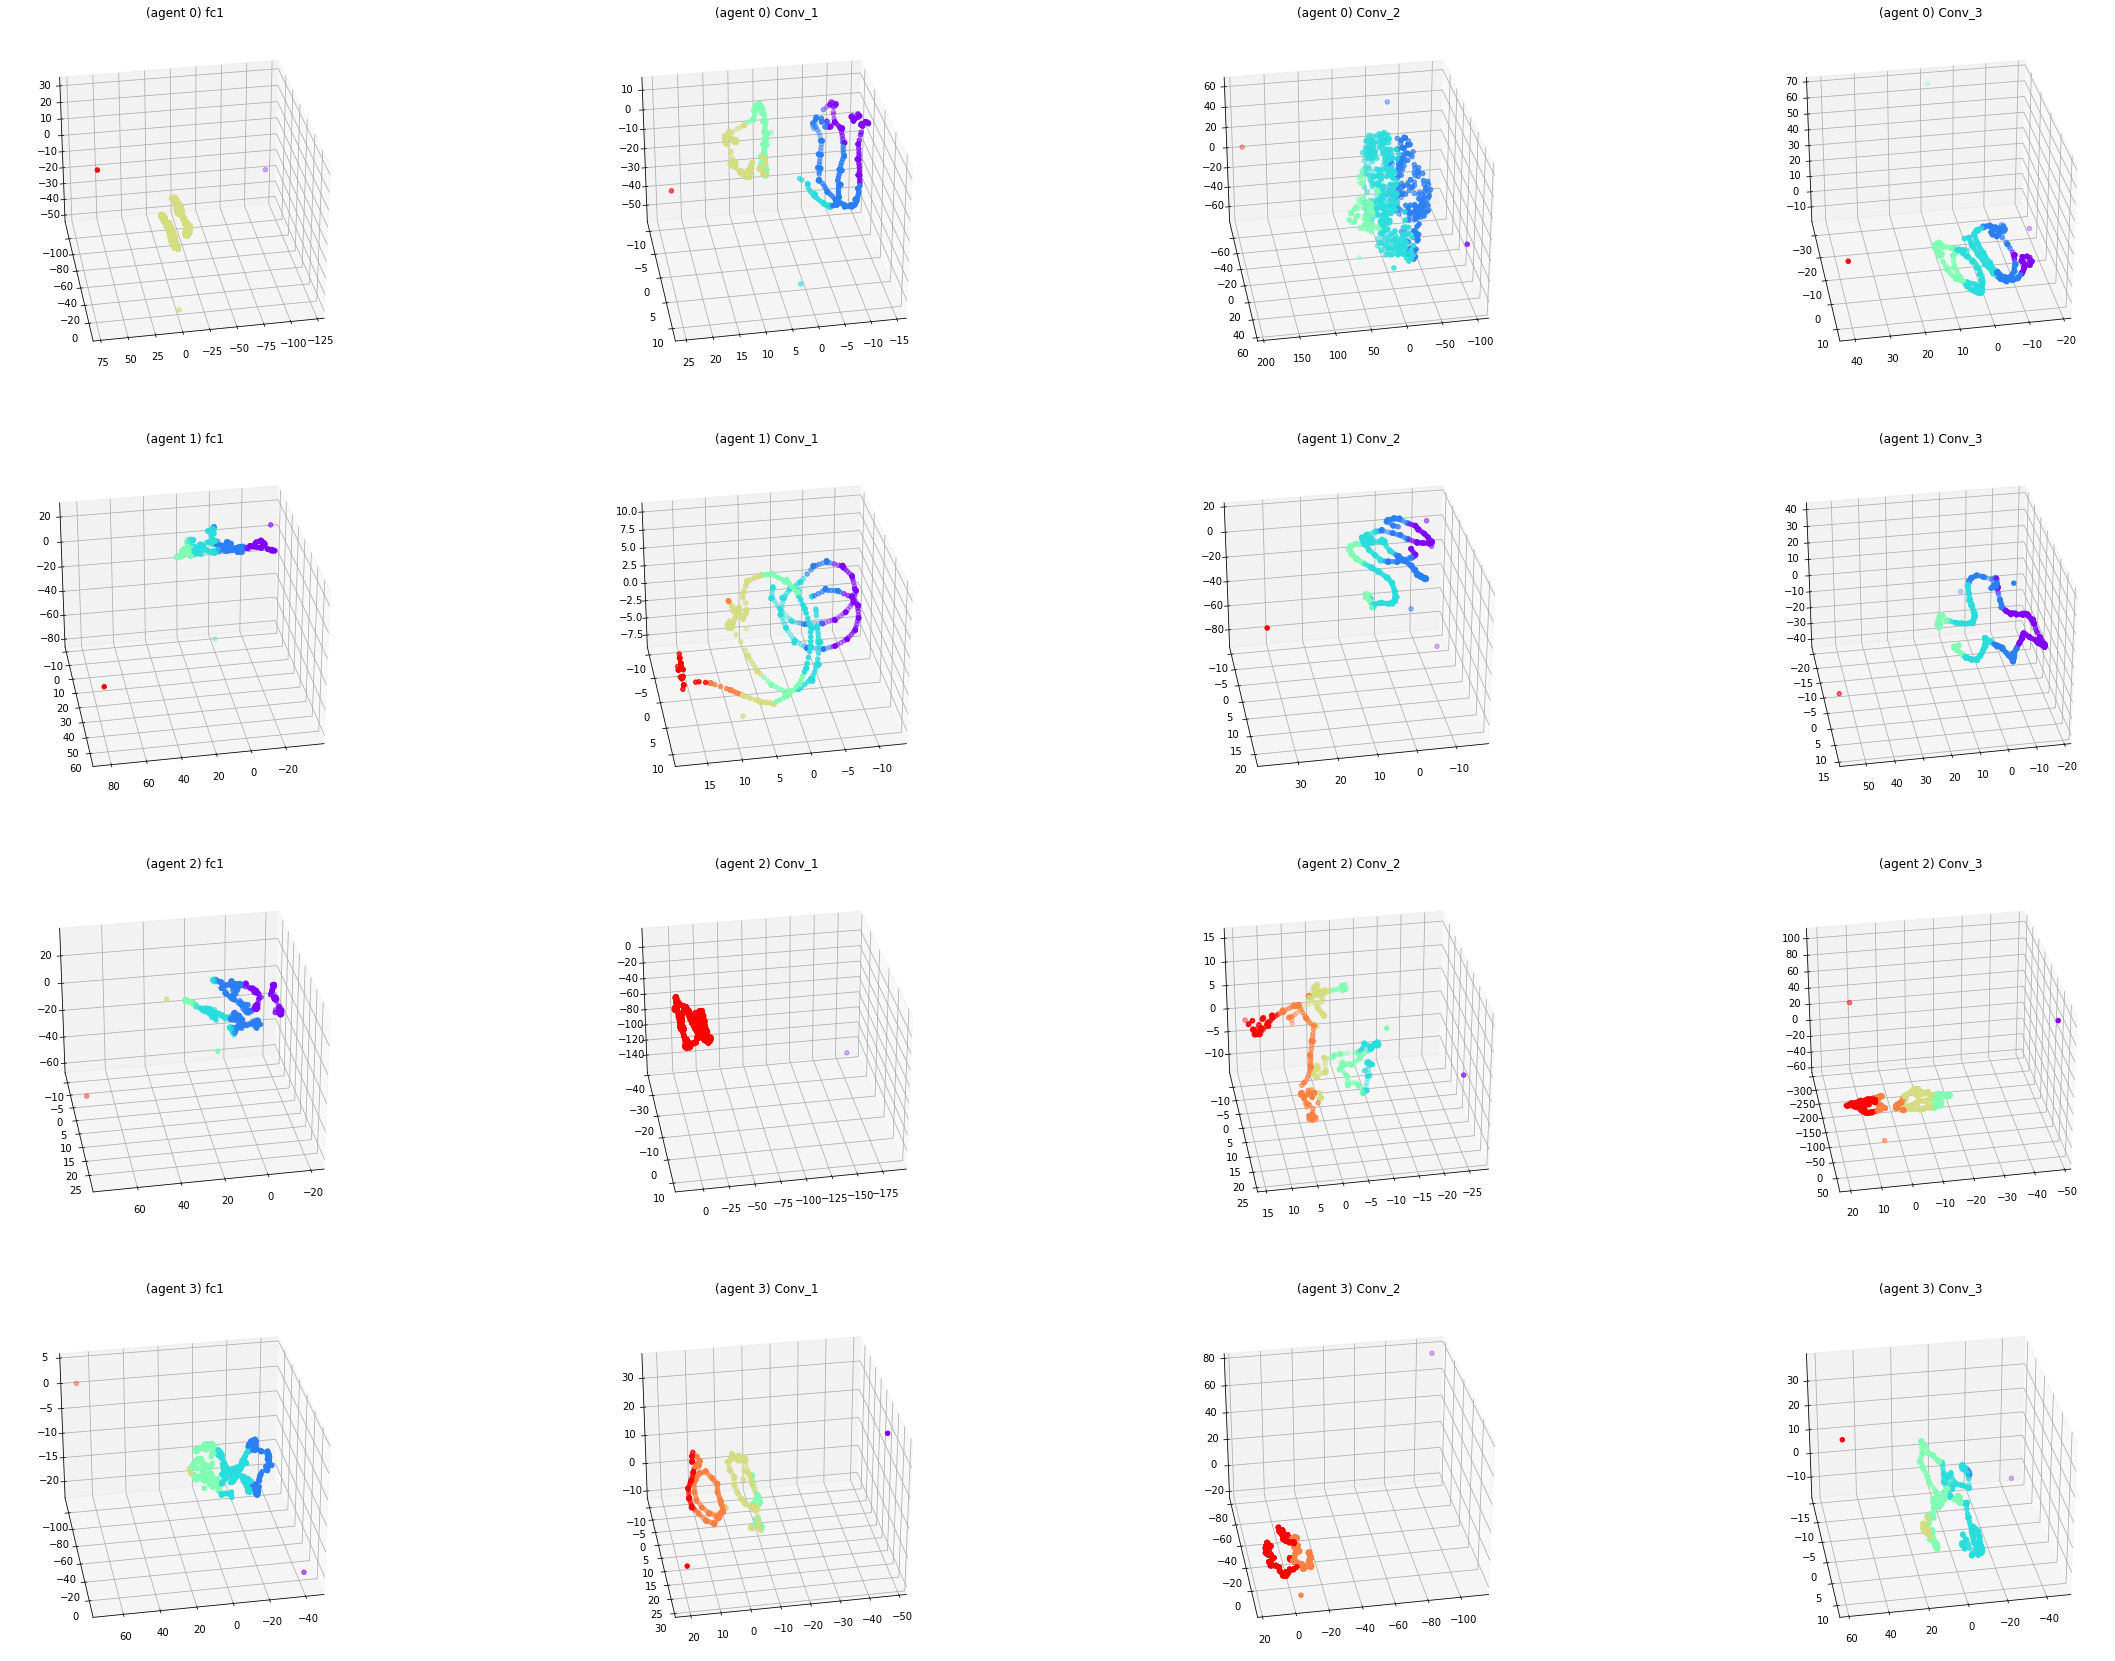

In [33]:
model = manifold.TSNE(n_components=3, init="pca", random_state=0)

i = 1
fig = plt.figure(figsize=(40, 30))
for agent_number in range(len(Liste_agents)):
    print("agent_number",agent_number)
    for layer in range(len(Names_hook)):
        activity_layer = analysis.prepro(Liste_activation[agent_number][episode][layer])
        X  = model.fit_transform(activity_layer)
        colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 7))
        ax = fig.add_subplot(len(Liste_agents), len(Names_hook),i,projection='3d')
        sc = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],**colorize)
        ax.view_init(azim=80, elev=30)
        ax.axis("tight")
        ax.set_title("(agent %s) %s" % (agent_number, Names_hook[layer]))
        i+=1
plt.show()

In [37]:
a = torch.tensor([2,3,4])
b = torch.tensor([2,3,4])

print(a+b)

tensor([4, 6, 8])
